- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

Neal Gordon  
2017-02-20  

- - - -

## Solid Mechanics Tutorial

## Python Initilaization with module imports

In [338]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


## Functions 

In [ ]:
def T1(th):
    '''Stress Transform for Plane Stress 
    th=ply angle in degrees
    voight notation for stress tranform. sigma1 = T1 @ sigmax
    recall T1(th)**-1 == T1(-th)'''
    n = np.sin(th*np.pi/180)
    m = np.cos(th*np.pi/180)
    T1 = np.array( [[m**2, n**2, 2*m*n],  
                   [n**2, m**2,-2*m*n],  
                   [-m*n, m*n,(m**2-n**2)]])    
    return T1
    
def T2(th):
    '''Strain Transform for Plane Stress
    th=ply angle in degrees
    voight notation for strain transform. epsilon1 = T2 @ epsilonx'''
    n = np.sin(th*np.pi/180)
    m = np.cos(th*np.pi/180)
    T2 = np.array( [[m**2, n**2, m*n],  
                 [n**2, m**2,-m*n],  
                 [-2*m*n, 2*m*n,  (m**2-n**2)]])     
    return T2

# Materials
[index](#Mechpy)

## Stress and Strain
Stress is a tensor that can be broken into 

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$




# Stress Transformations
[index](#Mechpy)  

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & \sigma_{xz}\\
 \sigma_{yx} & \sigma_{yy} & \sigma_{yz}\\
 \sigma_{zx} & \sigma_{zy} & \sigma_{zz}
 \end{bmatrix} 
$$

reduce to plane stress

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \sigma_{xy} & 0 \\
 \sigma_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$

or

$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{xx} & \tau_{xy} & 0 \\
 \tau_{yx} & \sigma_{yy} & 0\\
 0 &           0 &           \sigma_{zz}
 \end{bmatrix} 
$$


$$
\overline{\sigma}=\begin{bmatrix}
 \sigma_{x} & \sigma_{xy} \\
 \sigma_{yx} & \sigma_{y} \\
 \end{bmatrix} 
$$

Transformation

$$
A=\begin{bmatrix}
 cos(\theta) & sin(\theta) \\
 -sin(\theta) & cos(\theta) \\
 \end{bmatrix} 
$$

$$
\sigma'=A \sigma A^T
$$


$$
\sigma_1 , \sigma_2 = \frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}
$$


$$
T=\left[\begin{matrix}\sin^{2}{\left (\theta \right )} & \cos^{2}{\left (\theta \right )} & 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\cos^{2}{\left (\theta \right )} & \\
\sin^{2}{\left (\theta \right )} & - 2 \sin{\left (\theta \right )} \cos{\left (\theta \right )}\- \sin{\left (\theta \right )} \cos{\left (\theta \right )} & \\
\sin{\left (\theta \right )} \cos{\left (\theta \right )} & \sin^{2}{\left (\theta \right )} - \cos^{2}{\left (\theta \right )}\end{matrix}\right]
$$

In [2]:
import sympy as sp
from sympy.abc import tau, sigma
import numpy as np
sp.init_printing()

\frac{\sigma_{x}}{2} + \frac{\sigma_{y}}{2} + \sqrt{\tau_{xy}^{2} + \left(\frac{\sigma_{x}}{2} - \frac{\sigma_{y}}{2}\right)^{2}}


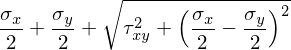

In [3]:
sx,sy,txy,tp = sp.symbols('sigma_x,sigma_y,tau_xy,theta_p')
sp1 = (sx+sy)/2 + sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
sp2 = (sx+sy)/2 - sp.sqrt( ((sx-sy)/2)**2 + txy**2 )
print(sp.latex(sp1))
sp1

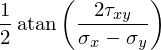

In [4]:
tp = sp.atan(2*txy/(sx-sy) )/2
tp

In [5]:
tpp = tp.evalf(subs={sx:10,sy:15,txy:10})
tpp

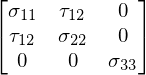

In [6]:
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13,t,t12 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13,tau,tau12')
s = sp.Matrix([[s11,t12,0],[t12,s22,0],[0,0,s33]])
s

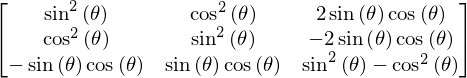

In [7]:
t = sp.symbols('theta')
m = sp.sin(t)
n = sp.cos(t)
T = sp.Matrix([[m**2,n**2, 2*m*n],[n**2,m**2,-2*m*n],[-m*n,m*n,m**2-n**2]])
T

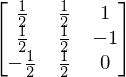

In [8]:
T1 = T.subs(t, sp.pi/4)
T1

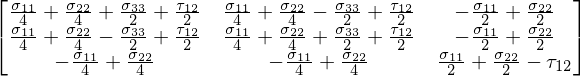

In [9]:
sprime = T1 * s * T1.inv()
sprime

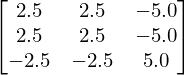

In [10]:
sprime.evalf(subs={s11:10, s22:00, s33:0, t12:0})

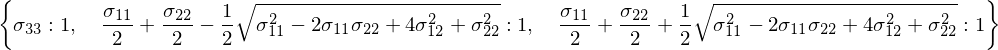

In [64]:
s.eigenvals()

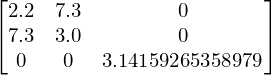

In [65]:
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

## Stress transformation with equations 

In [2]:
%matplotlib inline

In [3]:
cd ..

U:\Engineering Department\Gordon_Neal\Documents\eng_toolbox\mechpy


In [22]:
from mechpy.math import T2rot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)

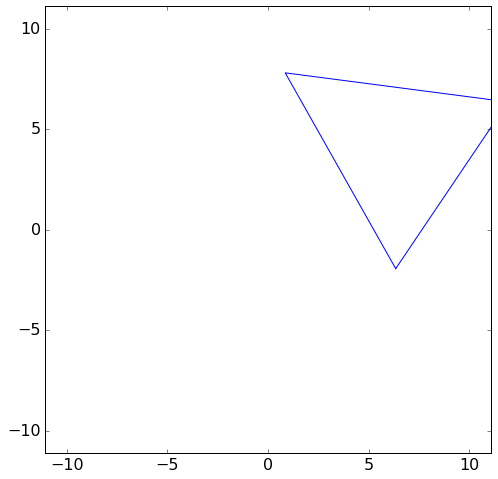

In [38]:
from IPython.html.widgets import *
from mechpy.math import T2rot
#x = [-1,1, 0,-1,]
#y = [-1,-1,1,-1]
#xy = np.array([x,y])
#plt.xlim([-11.1,11.1])
#plt.ylim([-11.1,11.1])
#xyR = np.dot(T2rot(30),xy)
#plt.plot(xyR[0,:],xyR[1,:])
fig1 = plt.figure(figsize=(10,8))
def rot2(th, xt,yt,zt):
    xyR = np.dot(T2rot(th),xy*zt)
    xyR[0,:]+=xt
    xyR[1,:]+=yt
    plt.plot(xyR[0,:],xyR[1,:])
    plt.axis('square')
    plt.xlim([-11.1,11.1])
    plt.ylim([-11.1,11.1])    
    plt.show()

interact(rot2, th=(0,np.pi,np.pi/90), yt=(1,10,1), xt=(1,10,1), zt=(1,10,1));

transformed stress
[33.493649053890351, 466.50635094610965, 125.00000000000003]
---principal stresses---
sigma1p = 500.00
sigma2p = 0.00
principal plane angle = 15.00
---principal shear---
tauxyp = 250.00 with avg normal stress = 250.00


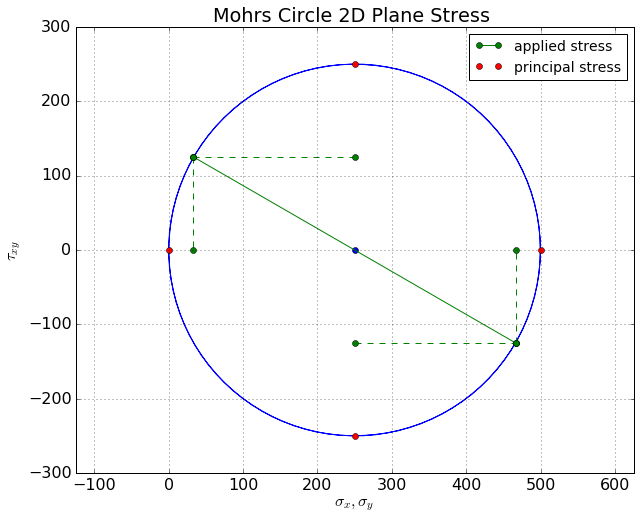

In [47]:
# stress angle transformation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(10,8))
def mohr(sigmax, sigmay, tauxy, angle):
    plt.figure(figsize=(10,8))
    # angle rotates clockwise
    theta = (angle-90) * np.pi/180
    # stress transformed to any angle
    sigmaxt = (sigmax + sigmay)/2 + (sigmax-sigmay)/2 * np.cos(2*theta) + tauxy*np.sin(2*theta)
    sigmayt = (sigmax + sigmay)/2 + (sigmax-sigmay)/2 * np.cos(2*(theta + np.pi/2)) + tauxy*np.sin(2*(theta+ np.pi/2))
    tauxyt = -(sigmax-sigmay)/2*np.sin(2*theta) + tauxy*np.cos(2*theta)
    print('transformed stress')
    print([sigmaxt, sigmayt, tauxyt])

    # principal stresses
    sigma1p = (sigmaxt + sigmayt)/2 + np.sqrt( ((sigmaxt-sigmayt)/2)**2 + tauxyt**2)
    sigma2p = (sigmaxt + sigmayt)/2 - np.sqrt( ((sigmaxt-sigmayt)/2)**2 + tauxyt**2)
    tauxyp = np.sqrt( ( (sigmaxt-sigmayt)/2 )**2 + tauxyt**2  )
    sigmap = [sigma1p, sigma2p]
    thetap = -np.arctan(tauxyt/ ((sigmaxt-sigmayt)/2)) / 2 * 180 / np.pi
    sigmaavg = (sigma1p+sigma2p)/2
    R = np.sqrt(((sigmaxt-sigmayt)/2)**2 + tauxyt**2)

    print('---principal stresses---')
    print('sigma1p = {:.2f}'.format(sigma1p) )
    print('sigma2p = {:.2f}'.format(sigma2p) )
    print('principal plane angle = {:.2f}'.format(thetap) )
    print('---principal shear---')
    print('tauxyp = {:.2f} with avg normal stress = {:.2f}'.format(tauxyp,sigmaavg))

    r = np.linspace(-2*np.pi,2*np.pi,100)

    ## keep this for sigma3
    # x = np.cos(r) * (sigma1p/2) + sigma1p/2
    # y = np.sin(r) * (sigma1p/2) 
    # plt.plot(x,y,'bo', sigmaavg,0,'bo')  
    # x = np.cos(r) * (sigma2p/2) + sigma2p/2
    # y = np.sin(r) * (sigma2p/2) 
    # plt.plot(x,y,'bo', sigmaavg,0,'bo')  

    x = np.cos(r) * R + sigmaavg
    y = np.sin(r) * R
    plt.plot(x,y,'b', sigmaavg,0,'bo')  

    plt.plot([sigmaxt,sigmayt],[tauxyt, -tauxyt], 'g-o', label='applied stress');
    plt.plot([sigma1p,sigma2p],[0,0],'ro');
    plt.plot([sigmaavg,sigmaavg],[tauxyp,-tauxyp], 'ro', label='principal stress');
    plt.plot([sigmaxt,sigmaxt],[tauxyt, 0], '--g'); plt.plot([sigmaxt,sigmaxt],[tauxyt, 0], 'og');
    plt.plot([sigmayt,sigmayt],[-tauxyt, 0], '--g'); plt.plot([sigmayt,sigmayt],[-tauxyt, 0], 'og');
    plt.plot([sigmaavg, sigmaxt],[tauxyt, tauxyt], '--g'); plt.plot([sigmaavg, sigmaxt],[tauxyt, tauxyt], 'og');
    plt.plot([sigmaavg, sigmayt],[-tauxyt, -tauxyt], '--g'); plt.plot([sigmaavg, sigmayt],[-tauxyt, -tauxyt], 'og');
    plt.axis('equal') ; plt.grid();
    plt.xlabel('$\sigma_x,\sigma_y$');
    plt.ylabel('$\\tau_{xy}$');
    plt.title('Mohrs Circle 2D Plane Stress ');
    plt.legend();

interact(mohr, sigmax=(0,500,10),sigmay=(0,500,10),tauxy=(0,500,10),angle=(0,90,5));

transformed stress
[-4.898587196589413e-15, -20.0, -40.0]
---principal stresses---
sigma1p = 31.23
sigma2p = -51.23
principal plane angle = 37.98
---principal shear---
tauxyp = 41.23 with avg normal stress = -10.00


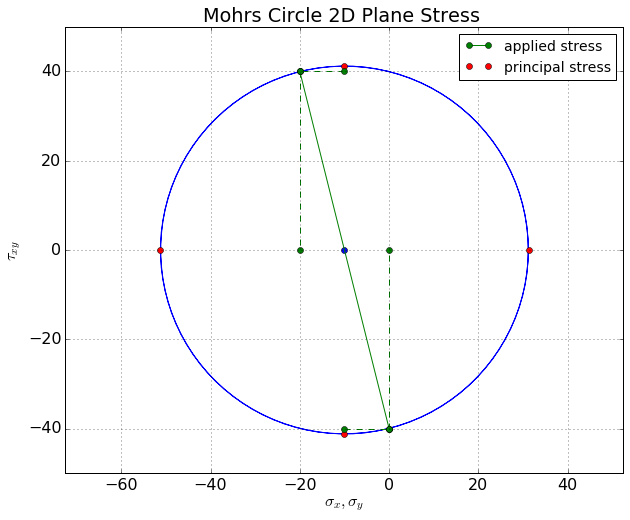

In [41]:
# stress angle transformation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 14

sigmax = -20   
sigmay = 0  
tauxy = 40   

angle = 0

# angle rotates clockwise
theta = (angle-90) * np.pi/180
# stress transformed to any angle
sigmaxt = (sigmax + sigmay)/2 + (sigmax-sigmay)/2 * np.cos(2*theta) + tauxy*np.sin(2*theta)
sigmayt = (sigmax + sigmay)/2 + (sigmax-sigmay)/2 * np.cos(2*(theta + np.pi/2)) + tauxy*np.sin(2*(theta+ np.pi/2))
tauxyt = -(sigmax-sigmay)/2*np.sin(2*theta) + tauxy*np.cos(2*theta)
print('transformed stress')
print([sigmaxt, sigmayt, tauxyt])

# principal stresses
sigma1p = (sigmaxt + sigmayt)/2 + np.sqrt( ((sigmaxt-sigmayt)/2)**2 + tauxyt**2)
sigma2p = (sigmaxt + sigmayt)/2 - np.sqrt( ((sigmaxt-sigmayt)/2)**2 + tauxyt**2)
tauxyp = np.sqrt( ( (sigmaxt-sigmayt)/2 )**2 + tauxyt**2  )
sigmap = [sigma1p, sigma2p]
thetap = -np.arctan(tauxyt/ ((sigmaxt-sigmayt)/2)) / 2 * 180 / np.pi
sigmaavg = (sigma1p+sigma2p)/2
R = np.sqrt(((sigmaxt-sigmayt)/2)**2 + tauxyt**2)

print('---principal stresses---')
print('sigma1p = {:.2f}'.format(sigma1p) )
print('sigma2p = {:.2f}'.format(sigma2p) )
print('principal plane angle = {:.2f}'.format(thetap) )
print('---principal shear---')
print('tauxyp = {:.2f} with avg normal stress = {:.2f}'.format(tauxyp,sigmaavg))

r = np.linspace(-2*np.pi,2*np.pi,100)

## keep this for sigma3
# x = np.cos(r) * (sigma1p/2) + sigma1p/2
# y = np.sin(r) * (sigma1p/2) 
# plt.plot(x,y,'bo', sigmaavg,0,'bo')  
# x = np.cos(r) * (sigma2p/2) + sigma2p/2
# y = np.sin(r) * (sigma2p/2) 
# plt.plot(x,y,'bo', sigmaavg,0,'bo')  

x = np.cos(r) * R + sigmaavg
y = np.sin(r) * R
plt.plot(x,y,'b', sigmaavg,0,'bo')  

plt.plot([sigmaxt,sigmayt],[tauxyt, -tauxyt], 'g-o', label='applied stress');
plt.plot([sigma1p,sigma2p],[0,0],'ro');
plt.plot([sigmaavg,sigmaavg],[tauxyp,-tauxyp], 'ro', label='principal stress');
plt.plot([sigmaxt,sigmaxt],[tauxyt, 0], '--g'); plt.plot([sigmaxt,sigmaxt],[tauxyt, 0], 'og');
plt.plot([sigmayt,sigmayt],[-tauxyt, 0], '--g'); plt.plot([sigmayt,sigmayt],[-tauxyt, 0], 'og');
plt.plot([sigmaavg, sigmaxt],[tauxyt, tauxyt], '--g'); plt.plot([sigmaavg, sigmaxt],[tauxyt, tauxyt], 'og');
plt.plot([sigmaavg, sigmayt],[-tauxyt, -tauxyt], '--g'); plt.plot([sigmaavg, sigmayt],[-tauxyt, -tauxyt], 'og');
plt.axis('equal') ; plt.grid();
plt.xlabel('$\sigma_x,\sigma_y$');
plt.ylabel('$\\tau_{xy}$');
plt.title('Mohrs Circle 2D Plane Stress ');
plt.legend();

## Stress Transformation with matrices

In [413]:
# Principal PLane Stress

sigmax = -20   
sigmay = 90  
tauxy = 60   

sigma = np.array([[sigmax, tauxy, 0],
                  [tauxy,  sigmay,0],
                  [0,      0,     0]])

sigmap = np.linalg.eig(sigma)[0]
print('\n principal stresses')
print(sigmap)

thetap = np.linalg.eig(sigma)[1]  # principal cosine angle

print('\n principal plane angle')
print(np.arccos(thetap)*180/np.pi-90)



 principal stresses
[ -46.39410298  116.39410298    0.        ]

 principal plane angle
[[ 66.25522354  23.74477646   0.        ]
 [-23.74477646  66.25522354   0.        ]
 [  0.           0.         -90.        ]]


In [414]:
# specified angle stress transformation

sigmax = -20   
sigmay = 90  
tauxy = 60    

sigma = np.array([[sigmax, tauxy, 0],
                  [tauxy,  sigmay,0],
                  [0,      0,     0]])

ang = 23
sigmat = T1(ang) @ sigma @ np.transpose(T1(ang))

print('\n transformed stresses')
print(sigmat)



 transformed stresses
[[  3.26191148  53.53187815  26.02803718]
 [ 53.53187815  79.67433223  13.53565184]
 [ 26.02803718  13.53565184  -6.46812185]]


In [377]:
# maximum in-plane shear stress
eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

-23.744776461


In [56]:
tauxy = 0    # lbs/in 
sigmax = 100   # lbs/in
sigmay = np.linspace(0,1.100)   # lbs/in

eps = 1e-16   # machine epsilon to avoid divide-by-zero error
rad_to_deg = 180/np.pi
theta1 = 0.5 * np.arctan( 2*tauxy / ((sigmax-sigmay+eps))) * rad_to_deg
print(theta1)

# sigmax = 100
# sigmay = np.linspace(0,1.100)
# tauxy = 0
# tparray = sp.atan(2*tauxy/(sigmax-sigmay) )/2
# tparray

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
sigma

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 0]])

In [18]:
th = np.pi/4  # 45 deg
m = np.cos(th)
n = np.sin(th)
A = np.array([ [m,n],[-n,m]])

tauxy = 1    # lbs/in 
sigmax = 0   # lbs/in
sigmay = 0   # lbs/in

sigma = np.array([[sigmax, tauxy],
                  [tauxy,   sigmay]])

sigmat = A @ sigma @ A.T  # transformed stress
sigmat

array([[ 1.,  0.],
       [ 0., -1.]])

In [19]:
sigmap = np.linalg.eig(sigmat)[0]  # principal stresses
print(sigmap)

thetap = np.linalg.eig(sigmat)[1]  # principal planes
print(thetap* 180/np.pi)

[ 1. -1.]
[[ 57.29577951   0.        ]
 [  0.          57.29577951]]


In [20]:
# Principal Stresses

sx  = 63.66
sy  = 0
sz  = 0
txy = 63.66
txz = 0
tyz = 0

S = np.matrix([[sx, txy, txz],
            [txy, sy, tyz],
            [txy, txz, sz]])

print(S)

[[ 63.66  63.66   0.  ]
 [ 63.66   0.     0.  ]
 [ 63.66   0.     0.  ]]


In [21]:
principal_stresses = np.linalg.eigvals(S)
print(principal_stresses)

[   0.          -39.34404372  103.00404372]


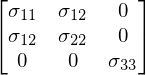

In [22]:
import sympy as sp
from sympy.abc import tau, sigma
#s,s11,s22,s33,s12 = sp.var('s,s11,s22,s33,s12')
s,s11,s22,s33,s12,s13 = sp.symbols('sigma, sigma11,sigma22,sigma33,sigma12,sigma13')
s = sp.Matrix([[s11,s12,0],[s12,s22,0],[0,0,s33]])
s

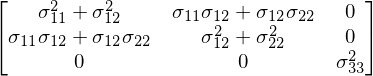

In [23]:
s**2

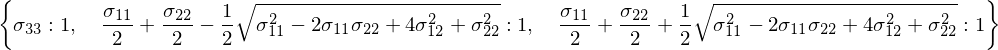

In [24]:
s.eigenvals()  # hmm looks familiar

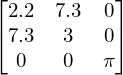

In [25]:
s1 = s.subs(s11,2.2).subs(s22,3).subs(s33,sp.pi).subs(s12,7.3)
s1

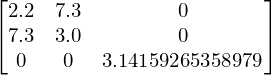

In [26]:
# or 
s2 = s.evalf(subs={s11:2.2, s22:3, s33:sp.pi, s12:7.3})
s2

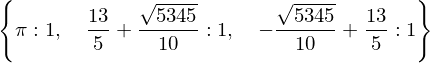

In [27]:
s1.eigenvals()

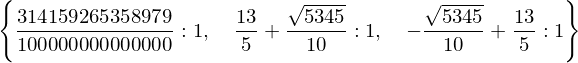

In [28]:
s2.eigenvals()

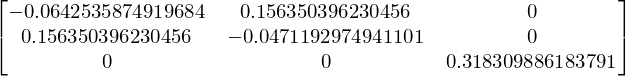

In [29]:
s2.inv()

In [30]:
C = sp.symbols('C1:100')
C